In [6]:
# Importación de la librería de SpaCy y displacy
import spacy
from spacy import displacy

# Cargamos núcleo de trabajo
pln_es = spacy.load('es_core_news_md')

In [7]:
# Ejemplos de exracción automática de entidades y sus significados

# MISC -->  Miscelaneo      [Miscellaneous entities, e.g. events, nationalities, products or works of art]
# LOC  -->  Locación        [Non-GPE locations, mountain ranges, bodies of water]
# ORG  -->  Organización    [Company's Name, Enterprise]
# PER  -->  Nombre Persona  [Named person or family.]
Ejemplos = [pln_es(u'Este año, nos vamos a mudar a la CDMX!'),
            pln_es(u'Para más información, envíar un correo a la dirección actumlogo@gmail.com o visita la página http://www.sitiogenerico.com!'),
            pln_es(u'Viaje de 5km hasta CDMX, Costos de viaje en Uber $125.50'),
            pln_es(u'Vamos a visitar Edo. de Veracruz en M.X. el año que sigue'),
            pln_es(u'Hola mundo, qué tal va todo en ActumLogos?')]

for ejemplo in Ejemplos:
    for entidad in ejemplo.ents:
        print("Texto ", entidad)
        print("Tipo ", entidad.label_)
        print('\n')

Texto  CDMX
Tipo  LOC


Texto  CDMX
Tipo  LOC


Texto  Costos de viaje en Uber
Tipo  MISC


Texto  Edo
Tipo  LOC


Texto  Veracruz
Tipo  LOC


Texto  M.X.
Tipo  LOC


Texto  ActumLogos
Tipo  MISC


In [9]:
# Texto 1
Texto1 = pln_es(u"Amazon.com, Inc. es una compañía estadounidense de comercio electrónico y servicios de computación en la nube a todos los niveles con sede en la ciudad estadounidense de Seattle, Estado de Washington. Su lema es: From A to Z (traducido al español: «De la A a la Z»). Fue una de las primeras grandes compañías en vender bienes a través de Internet. Amazon también posee Alexa Internet, Shopbop, Internet Movie Database (IMDb), Zappos.com, DPreview.com y Twitch1​ en Irlanda, Canadá, Australia, Alemania, Austria, Francia, China, Japón, Italia, España, Países Bajos, Brasil, India y México para poder ofrecer los productos de esos países. También Amazon está presente en otros países desde donde realiza funciones de soporte, como en Costa Rica, desde donde centraliza la atención al cliente de Latinoamérica y con 7500 empleados es una de las mayores empresas del país.2 En la actualidad está totalmente diversificada en diferentes líneas de productos, ofreciendo DVD, CD de música, software, videojuegos, electrónica, ropa, muebles, comida, libros, etc. Es la marca de venta al por menor más valiosa del mundo según el índice BrandZ.​")
displacy.render(Texto1, style = 'ent', jupyter = True, options={'distance':110})

In [10]:
# Texto 2
Texto2 = pln_es(u"Alexa es un asistente virtual desarrollado por Amazon, utilizado por primera vez en los altavoces inteligentes Amazon Echo. Puede responder preguntas, reproducir música de servicios como Spotify, Apple Music, TuneIn y Amazon Music, crear listas de comprobación, establecer alarmas o temporizadores, reproducir podcasts y audiolibros, controlar dispositivos inteligentes, proveer información en tiempo real del clima, tráfico y brindar resúmenes de noticias, entre otros. Actualmente, Alexa está disponible en inglés, alemán, japonés, francés, italiano y español. Alexa puede controlar varios dispositivos inteligentes que sean compatibles con este sistema, como focos, interfonos, cámaras de videovigilancia e interruptores inteligentes. Los usuarios pueden extender las habilidades de Alexa instalando skills (funcionalidades adicionales desarrolladas por terceros parecidas a las aplicaciones) desde la app Alexa, también pueden crear rutinas para automatizar sus dispositivos inteligentes con base a un comando de voz, hora o ubicación.")
displacy.render(Texto2, style = 'ent', jupyter = True, options={'distance':110})

In [11]:
# Texto 3
Texto3 = pln_es(u"Amazon Echo (abreviado a Echo y conocido coloquialmente como Alexa) es una marca de altavoces inteligentes desarrollados por Amazon. Los dispositivos Echo se conectan al servicio de asistente personal inteligente controlado por voz Alexa, que responde a los nombres Alexa, Echo o Computer. Los usuarios pueden cambiar esta palabra de inicio a Amazon, Echo o Computer. Las características del dispositivo incluyen: interacción de voz, reproducción de música, hacer listas de tareas, configurar alarmas, transmitir podcasts y reproducir audiolibros, además de proporcionar información meteorológica, de tráfico y otra información en tiempo real. También puede controlar varios dispositivos inteligentes, actuando como un centro de automatización del hogar. Según informes confirmados, Amazon comenzó a desarrollar dispositivos Echo dentro de sus oficinas Lab126 en Silicon Valley y en Cambridge, Massachusetts, ya en 2010. El dispositivo representó uno de los primeros intentos de Amazon de expandir su cartera de dispositivos más allá del lector electrónico Kindle. The Echo apareció de manera prominente en el primer anuncio televisivo de transmisión del Super Bowl de Amazon en 2016.")
displacy.render(Texto3, style = 'ent', jupyter = True, options={'distance':110})

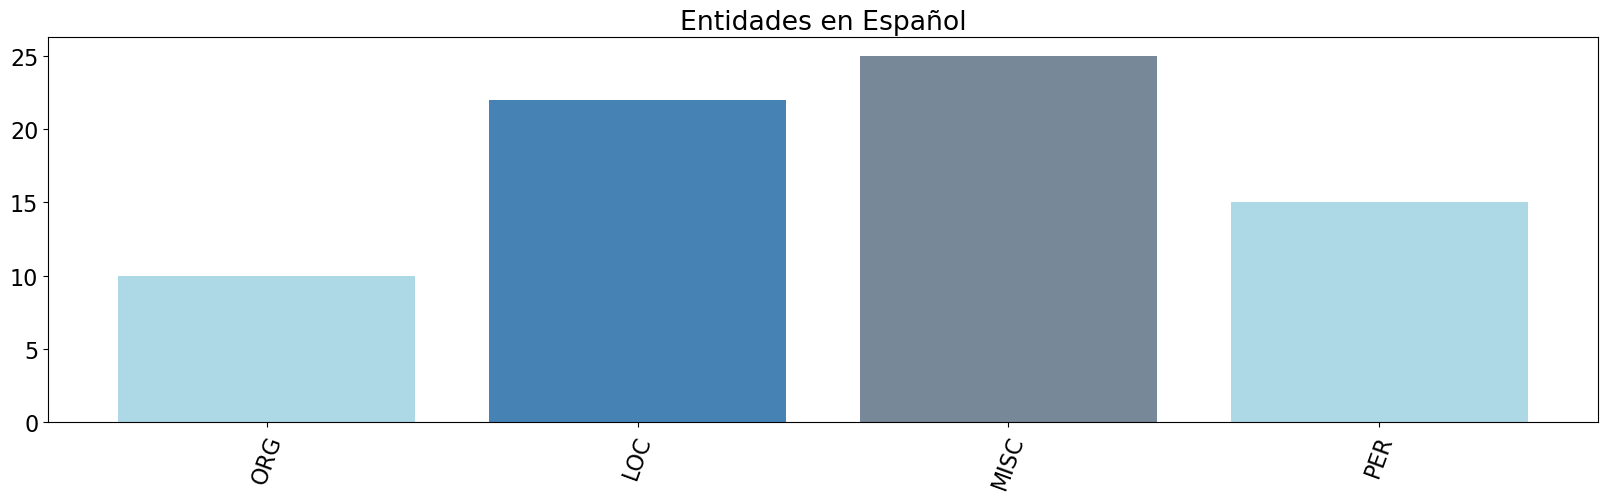

In [15]:
# Importamos la librería gráfica para trabajar
import matplotlib.pyplot as plt

# Creación de gráficas / Histogramas con las entidades detectadas
Textos = [Texto1, Texto2, Texto3]

# Initialize an empty dictionary to hold entities
Entidades = {}

# Process each text with spaCy to identify entities
for texto in Textos:
    doc = pln_es(texto)
    for Entidad in doc.ents:
        label = Entidad.label_
        if Entidades.get(label) is None:
            Entidades[label] = 1
        else:
            Entidades[label] += 1

# Plot the entities
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,5))
plt.bar(Entidades.keys(), Entidades.values(), color=['lightblue','steelblue','lightslategrey'])
plt.title('Entidades en Español')
plt.xticks(rotation=70)
plt.show()

In [25]:
# Escribir una función que reciba un texto (Entrada del usuario)
# y regrese un "Lugar encontrado", e imprima dicho lugar si se
# encuentra alguna entidad o entidades de tipo LOC

import spacy

def loc_search(Texto):
    doc = pln_es(Texto) # Procesar el texto con spaCy
    lugares = [ent.text for ent in doc.ents if ent.label_ == "LOC"] # Lista para guardar los lugares encontrados

    if lugares:
        res = ", ".join(lugares) # Si hay lugares, unimos todos en una cadena
        print("Lugar encontrado:", res)
    else:
        res = "No se encontraron lugares." # Si no hay lugares, regresamos un mensaje
        print(res)
    # return res

entrada = input("Introduce un texto: ")
loc_search(entrada)


Lugar encontrado: CDMX
